In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets,transforms
from torch.utils.data import DataLoader,TensorDataset

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
transform = transforms.ToTensor()
transform

ToTensor()

In [3]:
train_data = datasets.MNIST(root = "drive/MyDrive/PyTorch/Data", train = True, download = True, transform=transform)

In [4]:
test_data = datasets.MNIST(root = "drive/MyDrive/PyTorch/Data", train = False, download = True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: drive/MyDrive/PyTorch/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: drive/MyDrive/PyTorch/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
type(train_data),type(test_data)

(torchvision.datasets.mnist.MNIST, torchvision.datasets.mnist.MNIST)

In [8]:
image, label = train_data[0]

image.shape , label

(torch.Size([1, 28, 28]), 5)

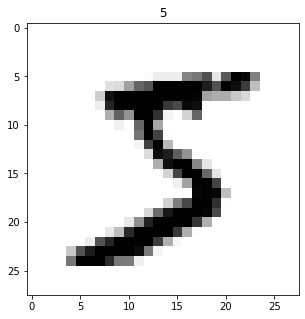

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(image.reshape(28,28), cmap = "gist_yarg")
plt.title(label)
plt.show()

In [10]:
torch.manual_seed(101)

# 0 images, 1 labels

train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)

test_loader = DataLoader(test_data, batch_size = 500, shuffle = False)

In [11]:
from torchvision.utils import make_grid

In [12]:
np.set_printoptions(formatter = dict(int=lambda x : f"{x:4}")) # Formating

In [13]:
for images, labels in train_loader:
    break

In [14]:
images.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [15]:
im = make_grid(images[:12], nrow = 12)

im.numpy().shape, im.shape

((3, 32, 362), torch.Size([3, 32, 362]))

Labels :  [   7    2    3    5    8    5    3    6    9    9    1    3]


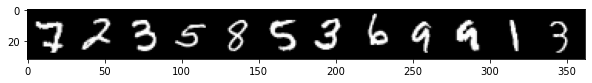

In [16]:
print("Labels : ",labels[:12].numpy())

plt.figure(figsize = (10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
plt.show()

In [17]:
# nn.ReLU
# F.relu

In [18]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, in_sz = 784, out_sz = 10, layers = [120,83]):

        super().__init__()
        self.fc1 = nn.Linear(in_sz, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], out_sz)

    def forward(self, X):

        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim = 1) # Multi Class Classification

In [19]:
torch.manual_seed(101)

model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=83, bias=True)
  (fc3): Linear(in_features=83, out_features=10, bias=True)
)

In [20]:
# ANN -- > CNN
for param in model.parameters():
    print(param.numel())    

94080
120
9960
83
830
10


In [21]:
for name, param in model.named_parameters():
    print(name , "\t", param)
    print("".center(200,"-"))

fc1.weight 	 Parameter containing:
tensor([[-0.0216, -0.0036, -0.0292,  ..., -0.0166, -0.0342, -0.0019],
        [ 0.0088,  0.0261,  0.0046,  ...,  0.0073,  0.0056, -0.0018],
        [-0.0336, -0.0348, -0.0216,  ..., -0.0165,  0.0112,  0.0169],
        ...,
        [-0.0076,  0.0201,  0.0078,  ..., -0.0320,  0.0136,  0.0322],
        [ 0.0054,  0.0088, -0.0012,  ..., -0.0004,  0.0340, -0.0168],
        [ 0.0025, -0.0317,  0.0235,  ...,  0.0104, -0.0027,  0.0276]],
       requires_grad=True)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fc1.bias 	 Parameter containing:
tensor([ 0.0225,  0.0126, -0.0301,  0.0324,  0.0033, -0.0250,  0.0008, -0.0147,
        -0.0153, -0.0268,  0.0257,  0.0021, -0.0340, -0.0067, -0.0083,  0.0333,
        -0.0021, -0.0307,  0.0213,  0.0069, -0.0189, -0.0086,  0.0175, -0.0112,
        -0.0018, -0.0016, -0.0

In [22]:
# 105, 124 Total Parameters

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [24]:
images.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [25]:
images.view(100,-1).shape

torch.Size([100, 784])

In [26]:
import time

start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for i in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for b , (X_train, y_train) in enumerate(train_loader):

        b+=1

        y_pred = model(X_train.view(100, -1)) # Flatten
        loss = criterion(y_pred, y_train)

        # Burda üretmiş olduğun y_pred --> y_pred.data.shape[100,10] 
        # Biz burdan max uygulamamız lazım ki hangisi seçiyor [1] olarak yazmamız orada argmax değeri oluyor !!!
        # Predicted --> predicted.shape -- > [100] olarak dönüyor 
        # Zaten bizim her y_train -- > shape olarak [100] olduğu için
        # Aralarından kaç tanesi doğru ise onu dönüyor...

        ## print(y_pred.data.shape)
        predicted = torch.max(y_pred.data, 1)[1]

        ## print(predicted.shape)
        batch_corr = (predicted == y_train).sum()
        trn_corr+=batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 200 == 0:
            acc = trn_corr.item() * 100 / (100*b)
            print(f"Epoch : {i:4}, Batch : {b:4} [{100*b:6}/60000], Loss : {loss.item():4.3f}, Accuracy : {acc:.3f}%")

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():

        for b, (X_test,y_test) in enumerate(test_loader):

            y_val = model(X_test.view(500,-1)) # Flatten

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr +=(predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time

print()
print(f"Duration : {total_time / 60} Minutes")

# 600 de sonlanması zaten her bir batch 100 tane olduğu için toplam yine 60000 elden geçirmiş oluyor!!

Epoch :    0, Batch :  200 [ 20000/60000], Loss : 0.218, Accuracy : 82.765%
Epoch :    0, Batch :  400 [ 40000/60000], Loss : 0.261, Accuracy : 87.097%
Epoch :    0, Batch :  600 [ 60000/60000], Loss : 0.207, Accuracy : 89.163%
Epoch :    1, Batch :  200 [ 20000/60000], Loss : 0.112, Accuracy : 94.420%
Epoch :    1, Batch :  400 [ 40000/60000], Loss : 0.124, Accuracy : 94.705%
Epoch :    1, Batch :  600 [ 60000/60000], Loss : 0.104, Accuracy : 94.940%
Epoch :    2, Batch :  200 [ 20000/60000], Loss : 0.155, Accuracy : 96.415%
Epoch :    2, Batch :  400 [ 40000/60000], Loss : 0.057, Accuracy : 96.457%
Epoch :    2, Batch :  600 [ 60000/60000], Loss : 0.185, Accuracy : 96.538%
Epoch :    3, Batch :  200 [ 20000/60000], Loss : 0.052, Accuracy : 97.485%
Epoch :    3, Batch :  400 [ 40000/60000], Loss : 0.049, Accuracy : 97.380%
Epoch :    3, Batch :  600 [ 60000/60000], Loss : 0.061, Accuracy : 97.338%
Epoch :    4, Batch :  200 [ 20000/60000], Loss : 0.099, Accuracy : 97.895%
Epoch :    4

In [27]:
len(train_loader),len(test_loader)

(600, 20)

In [28]:
len(train_losses),len(test_losses)

(10, 10)

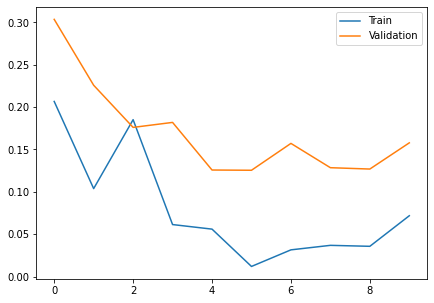

In [29]:
plt.figure(figsize = (7,5))

plt.plot(train_losses, label = "Train")
plt.plot(test_losses, label = "Validation")

plt.legend(loc = "best")
plt.show()

In [30]:
len(train_correct),len(test_correct)

(10, 10)

In [31]:
train_acc = [t / 600 for t in train_correct]
train_acc

[tensor(89.1633),
 tensor(94.9400),
 tensor(96.5383),
 tensor(97.3383),
 tensor(97.8617),
 tensor(98.3667),
 tensor(98.6300),
 tensor(98.8133),
 tensor(99.0700),
 tensor(99.1950)]

In [32]:
test_acc = [t / 100 for t in test_correct]
test_acc

[tensor(94.0600),
 tensor(95.8200),
 tensor(96.6900),
 tensor(96.8500),
 tensor(97.2300),
 tensor(97.4400),
 tensor(96.4900),
 tensor(97.5700),
 tensor(97.5700),
 tensor(97.4500)]

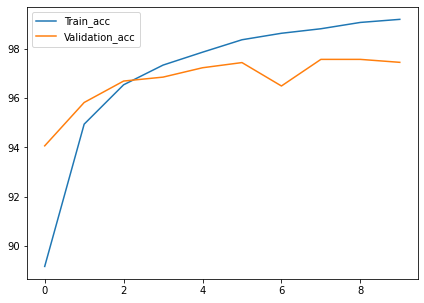

In [33]:
plt.figure(figsize = (7,5))

plt.plot(train_acc, label = "Train_acc")
plt.plot(test_acc, label = "Validation_acc")

plt.legend(loc = "best")
plt.show()

In [34]:
print(test_correct)
print()
print(f"Test Accuracy : {test_correct[-1].item()*100/10000:.3f}%")

[tensor(9406), tensor(9582), tensor(9669), tensor(9685), tensor(9723), tensor(9744), tensor(9649), tensor(9757), tensor(9757), tensor(9745)]

Test Accuracy : 97.450%


In [35]:
len(train_data), len(test_data)

(60000, 10000)

In [36]:
# Extract The Data All At Once, Not In Batches

test_load_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [37]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:

        y_val = model(X_test.view(len(X_test), -1))
        predicted = torch.max(y_val, 1)[1]
        correct +=(predicted == y_test).sum()

print(f"Test Accuracy : {correct.item() / len(test_data)} = {correct.item()*100 / (len(test_data)):7.3f}%")

Test Accuracy : 0.9745 =  97.450%


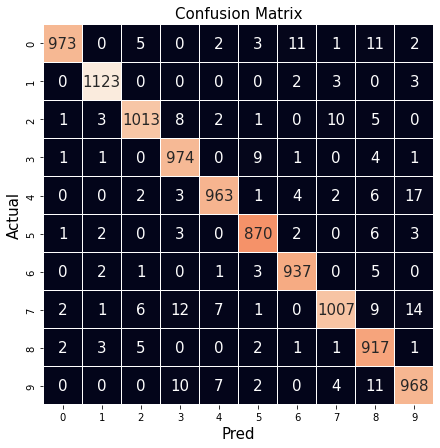

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predicted.view(-1), y_test.view(-1))
size = 15
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths=.3, linecolor="white", fmt = "d" , cbar = False , annot_kws = {"size" : 15})
plt.ylabel("Actual", fontsize = 15)
plt.xlabel("Pred", fontsize = 15)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

---

In [39]:
misses = np.array([])

for i in range(len(predicted.view(-1))):
    
    if predicted[i] != y_test[i]:
    
        misses = np.append(misses, i).astype("int64")

In [40]:
len(misses)

255

In [41]:
misses[:10]

array([ 149,  247,  259,  290,  321,  340,  381,  445,  495,  543])

In [42]:
r = 12
row = iter(np.array_split(misses, len(misses) // r+1))

In [43]:
nextrow = next(row)
y_test[:10], y_test.index_select(0, torch.tensor(nextrow)).numpy()

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([   2,    4,    6,    8,    2,    5,    3,    6,    8,    8,    3,
           8]))

Index :  [ 583  619  684  691  720  740  844  874  878  938  947  951]
Label :  [   2    1    7    8    5    4    8    9    8    3    8    5]
Guess :  [   7    8    2    7    8    9    7    4    9    5    9    4]


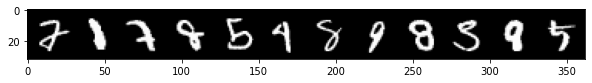

In [44]:
nextrow = next(row)
print("Index : ", nextrow)
print("Label : ", y_test.index_select(0,  torch.tensor(nextrow)).numpy())
print("Guess : ", predicted.index_select(0, torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images , nrow = r)
plt.figure(figsize = (10,4))
plt.imshow(np.transpose( im.numpy(), (1,2,0)))
plt.show()

----

# MNIST With CNNs

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets,transforms
from torch.utils.data import DataLoader,TensorDataset

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [46]:
transforms = transforms.ToTensor()

In [47]:
path = "drive/MyDrive/PyTorch/Data"

train_data = datasets.MNIST(root = path, download = True, train = True, transform = transforms)
test_data = datasets.MNIST(root = path, download = True, train = False, transform = transforms)

In [48]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [49]:
# 1 Color Channels , 6 Filters, 3by3 Kernel , Stride 1 ;
conv1 = nn.Conv2d(1,6,3,1)

# 6 Input Filters, 16 Filters, 3by3 Kernel, Stride 1 ;
conv2 = nn.Conv2d(6,16,3,1)

In [50]:
for i , (X_train, y_train) in enumerate(train_data):
    break

In [51]:
X_train.shape ,y_train

(torch.Size([1, 28, 28]), 5)

In [52]:
x = X_train.view(1,1,28,28) # 4D ---> 4D Batch (batch of 1 image)
x.shape

torch.Size([1, 1, 28, 28])

In [53]:
x = F.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

In [54]:
# Kernel, Strides
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 6, 13, 13])

In [55]:
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [56]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

In [57]:
11 / 2, (((28-2) / 2) -2 ) /2

(5.5, 5.5)

In [58]:
x = x.view(-1,16*5*5)
x.shape

torch.Size([1, 400])

In [59]:
class CNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X , dim = 1)

In [60]:
torch.manual_seed(42)

model = CNN()
model

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [61]:
#for name, param in model.named_parameters():
#    print(name, "\t", param)
#    print("".center(200,"-"))

In [62]:
total = []
for param in model.parameters():

    total.append(param.numel())
    print(param.numel())

print("".center(10,"_"))
print(np.sum(total))

54
6
864
16
48000
120
10080
84
840
10
__________
60074


In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [64]:
len(train_loader)

6000

In [65]:
import time

start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


for epoch in range(epochs):

    trn_corr = 0
    tst_corr = 0

    # Train

    for b, (X_train, y_train) in enumerate(train_loader):

        b+=1

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr +=batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 600 == 0:
            print(f"Epochs : {epoch:4}, Batch : {b:5.4f} [{10*b:6}/60000], Loss : {loss.item():10.4f} , Accuracy : {trn_corr.item()*100 / (10*b):7.3f}")


    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():

        for b, (X_test, y_test) in enumerate(test_loader):

            y_val = model(X_test)

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr +=(predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)


total_time = time.time() - start_time
print()
print(f"Duration : {total_time:.0f} seconds...")

Epochs :    0, Batch : 600.0000 [  6000/60000], Loss :     0.0406 , Accuracy :  78.417
Epochs :    0, Batch : 1200.0000 [ 12000/60000], Loss :     0.0825 , Accuracy :  85.800
Epochs :    0, Batch : 1800.0000 [ 18000/60000], Loss :     0.3642 , Accuracy :  88.689
Epochs :    0, Batch : 2400.0000 [ 24000/60000], Loss :     0.0186 , Accuracy :  90.537
Epochs :    0, Batch : 3000.0000 [ 30000/60000], Loss :     0.0084 , Accuracy :  91.680
Epochs :    0, Batch : 3600.0000 [ 36000/60000], Loss :     0.0024 , Accuracy :  92.517
Epochs :    0, Batch : 4200.0000 [ 42000/60000], Loss :     0.5999 , Accuracy :  93.171
Epochs :    0, Batch : 4800.0000 [ 48000/60000], Loss :     0.0220 , Accuracy :  93.633
Epochs :    0, Batch : 5400.0000 [ 54000/60000], Loss :     0.0071 , Accuracy :  94.054
Epochs :    0, Batch : 6000.0000 [ 60000/60000], Loss :     0.0580 , Accuracy :  94.370
Epochs :    1, Batch : 600.0000 [  6000/60000], Loss :     0.0130 , Accuracy :  97.767
Epochs :    1, Batch : 1200.0000 [

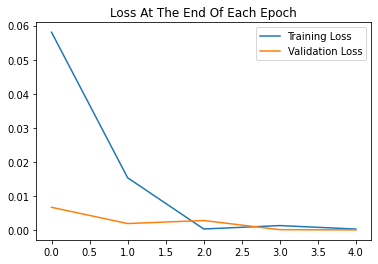

In [66]:
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Validation Loss")
plt.legend(loc = "best")
plt.title("Loss At The End Of Each Epoch")
plt.show()

In [67]:
len(train_data),len(test_data)

(60000, 10000)

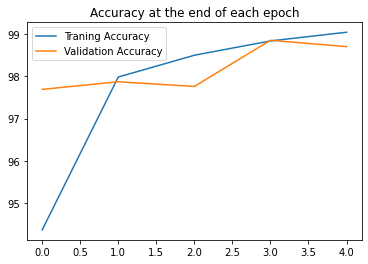

In [68]:
plt.plot([t / 600 for t in train_correct], label = "Traning Accuracy")
plt.plot([t / 100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy at the end of each epoch")
plt.legend(loc = "best")
plt.show()

In [69]:
test_load_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [70]:
with torch.no_grad():

    correct = 0

    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct +=(predicted == y_test).sum()

print(f"Test Accuracy : {correct.item()} / {len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%")

Test Accuracy : 9870 / 10000 =  98.700%


In [71]:
predicted.shape,y_test.shape

(torch.Size([10000]), torch.Size([10000]))

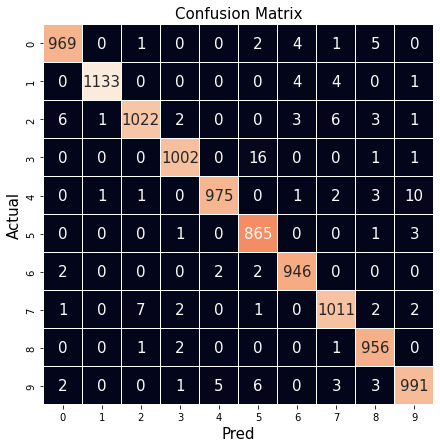

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted.view(-1), y_test.view(-1))
size = 15
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True, linewidths=.3, linecolor="white", fmt = "d" , cbar = False , annot_kws = {"size" : 15})
plt.ylabel("Actual", fontsize = 15)
plt.xlabel("Pred", fontsize = 15)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

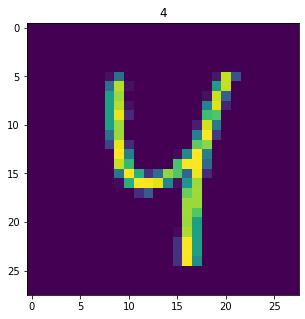

In [73]:
plt.figure(figsize = (5,5))
plt.imshow((test_data[2022])[0].reshape(28,28))
plt.title(test_data[2022][1])
plt.show()

In [74]:
model.eval()
with torch.no_grad():

    new_pred = model(test_data[2022][0].view(1,1,28,28))
    new_pred = torch.max(new_pred, 1)[1].item()

print("Prediction : ", new_pred)
print("Actual :" , test_data[2022][1])

Prediction :  4
Actual : 4


In [75]:
misses = np.array([])

for i in range(len(predicted.view(-1))):

    if predicted[i] != y_test[i]:
        misses = np.append(misses, i).astype("int64")

len(misses)

130

In [76]:
misses[:10]

array([  18,  321,  340,  359,  445,  490,  495,  582,  659,  674])

In [77]:
r = 12
row = iter(np.array_split(misses, len(misses) // r+1))

Index :  [  18  321  340  359  445  490  495  582  659  674  691  926]
Label :  [   3    2    5    9    6    0    8    8    2    5    8    2]
Guess :  [   8    7    3    4    0    2    0    2    7    3    4    8]


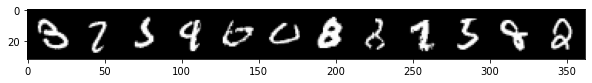

In [78]:
from torchvision.utils import make_grid

nextrow = next(row)

print("Index : ", nextrow)
print("Label : ", y_test.index_select(0, torch.tensor(nextrow)).numpy() )
print("Guess : ", predicted.index_select(0, torch.tensor(nextrow)).numpy() )

images = X_test.index_select( 0, torch.tensor(nextrow))
im = make_grid(images, nrow = r)

plt.figure(figsize = (10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));
plt.show()

----

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import DataLoader,TensorDataset
from torchvision.utils import make_grid

In [80]:
transforms = transforms.ToTensor()

In [81]:
path = "drive/MyDrive/PyTorch/Data"
train_data = datasets.CIFAR10(root = path, train = True, download = True, transform = transforms)
test_data = datasets.CIFAR10(root = path, train = False, download = True, transform = transforms)

Files already downloaded and verified
Files already downloaded and verified


In [82]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: drive/MyDrive/PyTorch/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [83]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: drive/MyDrive/PyTorch/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [84]:
torch.manual_seed(101)

train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle = False)

In [85]:
len(train_loader),len(test_loader)

(5000, 1000)

In [86]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [87]:
for images,labels in train_loader:
    break

In [88]:
labels

tensor([1, 5, 8, 1, 6, 1, 6, 3, 7, 9])

In [89]:
images[0].shape, np.transpose(images[0],(1,2,0)).shape

(torch.Size([3, 32, 32]), torch.Size([32, 32, 3]))

In [90]:
np.array([class_names[i] for i in labels])

array(['  car', '  dog', ' ship', '  car', ' frog', '  car', ' frog',
       '  cat', 'horse', 'truck'], dtype='<U5')

Label :  [   1    5    8    1    6    1    6    3    7    9]
Class :    car   dog  ship   car  frog   car  frog   cat horse truck


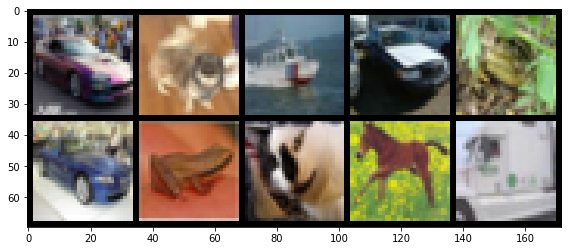

In [91]:
print("Label : ", labels.numpy())
print("Class : ", *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow = 5)

plt.figure(figsize = (10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
plt.show()

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [93]:
# Tensorflow ile kontrol !! 
# 3,3 kernel da -2 --> 5,5 da -4

model = Sequential()

model.add(Conv2D(filters = 6 , kernel_size =(5,5), activation = "relu", strides = 1, input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16 , kernel_size =(3,3), activation = "relu", strides = 1, input_shape = (32,32,1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 120, activation = "relu"))
model.add(Dense(units = 84, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 120)               6

In [94]:
class CNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3,1)
        self.conv2 = nn.Conv2d(6,16, 3,1)
        self.fc1 = nn.Linear(6*6*16, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,X):

        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1, 16*6*6)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.softmax(X, dim = 1)

In [95]:
torch.manual_seed(101)
model = CNN()
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [96]:
#for name,param in model.named_parameters():
#    print(name,"\t",param)
#    print("".center(100,"-"))

In [97]:
total = []
for param in model.parameters():
    print(param.numel())
    total.append(param.numel())

print("".center(10,"_"))
print(np.sum(total))

162
6
864
16
69120
120
10080
84
840
10
__________
81302


In [98]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [99]:
import time

start_time = time.time()

epochs = 5 
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for epoch in range(epochs):

    trn_corr = 0
    tst_corr = 0

    for b, (X_train, y_train) in enumerate(train_loader):

        b+=1

        y_pred = model(X_train)
        loss =criterion(y_pred, y_train)

        predicted = torch.max(y_pred, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr +=batch_corr

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b % 1000 == 0:
            
            print(f'Epoch: {epoch:2} , Batch: {b:4} [{10*b:6}/50000] , Loss: {loss.item():10.8f} , Accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)


    with torch.no_grad():

        for b, (X_test, y_test) in enumerate(test_loader):

            y_val = model(X_test)

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total_time = current_time - start_time
print()
print(f"Training took {total_time / 60} minutes ")

Epoch:  0 , Batch: 1000 [ 10000/50000] , Loss: 2.20256996 , Accuracy:  20.050%
Epoch:  0 , Batch: 2000 [ 20000/50000] , Loss: 2.24400711 , Accuracy:  24.350%
Epoch:  0 , Batch: 3000 [ 30000/50000] , Loss: 2.07446218 , Accuracy:  27.673%
Epoch:  0 , Batch: 4000 [ 40000/50000] , Loss: 2.23971772 , Accuracy:  29.738%
Epoch:  0 , Batch: 5000 [ 50000/50000] , Loss: 1.74597394 , Accuracy:  31.734%
Epoch:  1 , Batch: 1000 [ 10000/50000] , Loss: 1.92979753 , Accuracy:  40.780%
Epoch:  1 , Batch: 2000 [ 20000/50000] , Loss: 2.10577917 , Accuracy:  41.395%
Epoch:  1 , Batch: 3000 [ 30000/50000] , Loss: 2.04879689 , Accuracy:  41.923%
Epoch:  1 , Batch: 4000 [ 40000/50000] , Loss: 2.08744860 , Accuracy:  42.330%
Epoch:  1 , Batch: 5000 [ 50000/50000] , Loss: 1.97647154 , Accuracy:  42.518%
Epoch:  2 , Batch: 1000 [ 10000/50000] , Loss: 1.94657099 , Accuracy:  45.510%
Epoch:  2 , Batch: 2000 [ 20000/50000] , Loss: 2.03726888 , Accuracy:  45.880%
Epoch:  2 , Batch: 3000 [ 30000/50000] , Loss: 1.778

In [100]:
torch.save(model.state_dict(), "myCIFARmodel.pt")

model2 = CNN()

model2.load_state_dict(torch.load('CIFAR10-CNN-Model-master.pt'))

model2.eval()

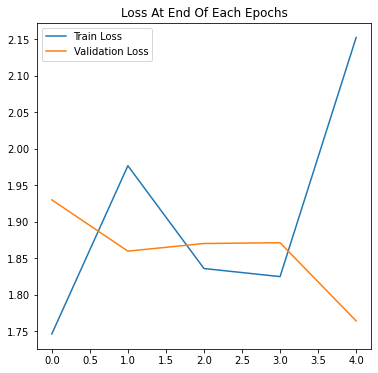

In [101]:
plt.figure(figsize = (6,6))
plt.plot(train_losses , label = "Train Loss")
plt.plot(test_losses, label = "Validation Loss")
plt.title("Loss At End Of Each Epochs")
plt.legend(loc = "best")
plt.show()

In [102]:
len(test_data),len(train_data)

(10000, 50000)

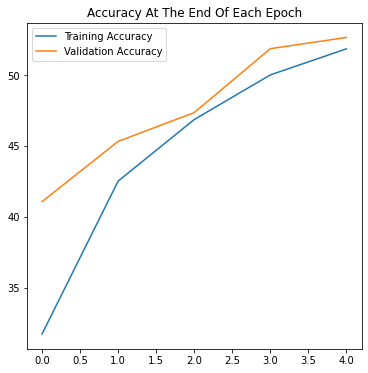

In [103]:
plt.figure(figsize = (6,6))
plt.plot([t/500 for t in train_correct], label = "Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("Accuracy At The End Of Each Epoch")
plt.legend(loc = "best")
plt.show()

In [104]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(4107), tensor(4532), tensor(4735), tensor(5186), tensor(5265)]

Test accuracy: 52.650%


In [105]:
test_load_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

with torch.no_grad():

    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val, 1)[1]
        correct += (predicted == y_test).sum()

print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 5265/10000 =  52.650%


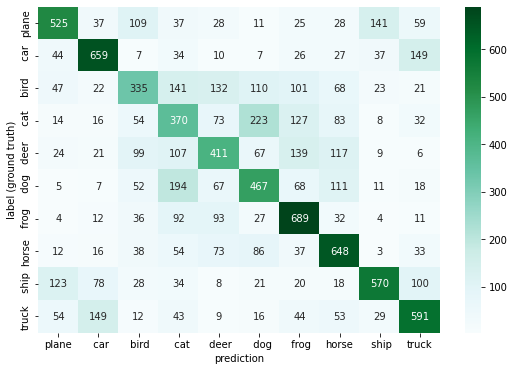

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(cm, class_names, class_names)
plt.figure(figsize = (9,6))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show()

In [107]:
misses = np.array([])

for i in range(len(predicted.view(-1))):

    if predicted[i] != y_test[i]:

        misses = np.append(misses ,i).astype("int64")

len(misses)

4735

In [108]:
misses[:8]

array([   1,    4,    6,   12,   15,   17,   19,   21])

In [109]:
r = 8
row = iter(np.array_split(misses, len(misses) // r+1))

Index: [   1    4    6   12   15   17   19   21]
Label: [   8    6    1    5    8    7    6    0]
Class:   ship  frog   car   dog  ship horse  frog plane

Guess: [   0    3    5    6    6    3    4    2]
Class:  plane   cat   dog  frog  frog   cat  deer  bird


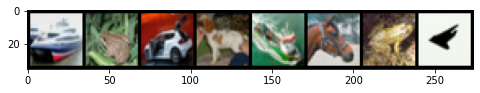

In [110]:
nextrow = next(row)
lbls = y_test.index_select(0, torch.tensor(nextrow)).numpy()
gues = predicted.index_select(0, torch.tensor(nextrow)).numpy()

print("Index:", nextrow)
print("Label:", lbls)
print("Class: ", *np.array([class_names[i] for i in lbls]))
print()
print("Guess:", gues)
print("Class: ", *np.array([class_names[i] for i in gues]))

images = X_test.index_select(0, torch.tensor(nextrow))
im = make_grid(images, nrow=r)

plt.figure(figsize = (8,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))
plt.show()